In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import shap  # For SHAP values
# Instead of importing plot_partial_dependence, import PartialDependenceDisplay
from sklearn.inspection import PartialDependenceDisplay

# Load the dataset
data = pd.read_csv('melb_data.csv')

# Display the first few rows of the dataset
data.head()

c:\Users\reyri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
# Drop rows with missing target variable values (assuming "Price" is the target variable)
data = data.dropna(subset=['Price'])

# Select features and target variable
X = data.drop(['Price'], axis=1)
y = data['Price']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dimensions of training and testing sets
X_train.shape, X_test.shape

((10864, 14071), (2716, 14071))

In [3]:
# Set up XGBoost model with initial parameters
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model with RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 263374.0813244766
R²: 0.8253688636328971


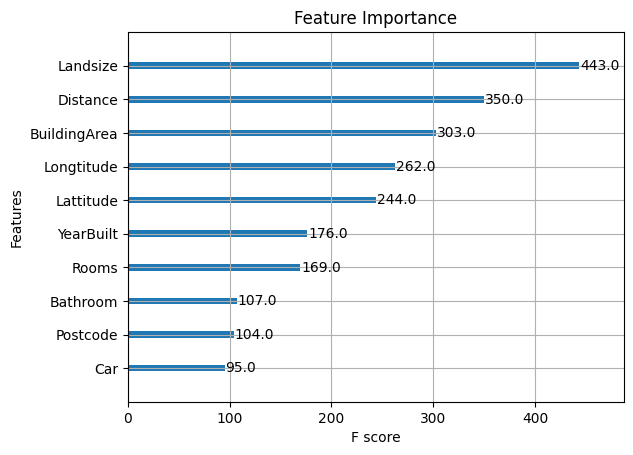

In [4]:
# Plot feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.show()

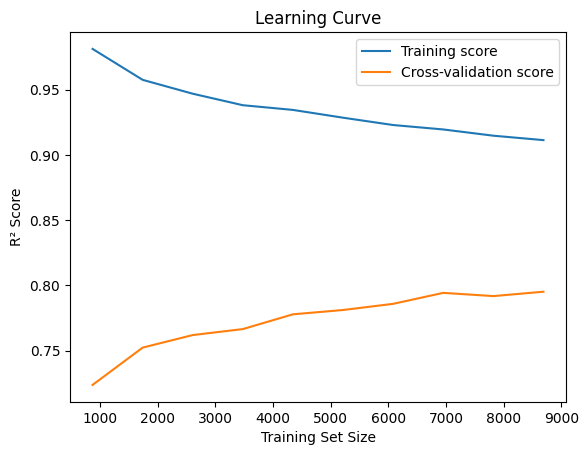

In [5]:
from sklearn.model_selection import learning_curve

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate average and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [16]:
# Initialize SHAP explainer
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP summary plot for feature impact on prediction
shap.summary_plot(shap_values, X_test, plot_type="bar")

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [27]:
# Partial Dependence Plot for the top feature
from sklearn.inspection import partial_dependence_plot
plot_partial_dependence(model, X_train, [0], grid_resolution=50)  # replace [0] with feature index or name
plt.title("Partial Dependence Plot")
plt.show()

ImportError: cannot import name 'partial_dependence_plot' from 'sklearn.inspection' (c:\Users\reyri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\inspection\__init__.py)